# Cumulative Cap
## imports and setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

palette = ['#507fb5', '#b5507f', '#7fb550', '#b58650']
sns.set_palette(sns.color_palette(palette))

## utils

In [2]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    transactions = evaler.eval('TransactionQuantity')
    agents = evaler.eval('Agents')
    ei = evaler.eval('ExplicitInventory')
    
    storage_id = agents.loc[agents["Prototype"] == "Storage"]["AgentId"]
    transaction_received = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    transaction_sent = transactions.loc[transactions["SenderId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_r': transaction_received,
            't_s': transaction_sent,
            'ei': ei}
    
    return name, data

## file names below

In [3]:
filenames = ['no-behavior.sqlite',
             'ccap-fixed-dormant.sqlite',
             'ccap-normal-dormant.sqlite',
             'ccap-with-disruption.sqlite',
             'ccap-reduced-rate.sqlite']

## load data

In [4]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

In [5]:
for datum in data:
    print(datum)

no-behavior
ccap-fixed-dormant
ccap-normal-dormant
ccap-with-disruption
ccap-reduced-rate


In [6]:
for f in data:
    data[f]['t_r']['CumQuant'] = data[f]['t_r']['Quantity'].cumsum()

<ipython-input-6-cd13edb0c3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f]['t_r']['CumQuant'] = data[f]['t_r']['Quantity'].cumsum()
<ipython-input-6-cd13edb0c3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f]['t_r']['CumQuant'] = data[f]['t_r']['Quantity'].cumsum()
<ipython-input-6-cd13edb0c3e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

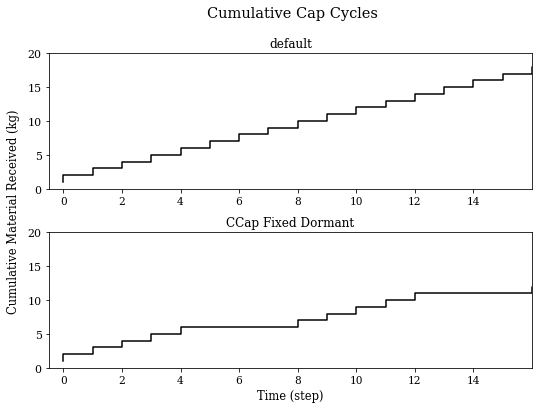

In [7]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,20)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 25, 5))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['CumQuant'],
         color= 'k')
ax0.set_title('default')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


ax1.step(data['ccap-fixed-dormant']['t_r']['Time'],
         data['ccap-fixed-dormant']['t_r']['CumQuant'],
         color= 'k')
ax1.set_title('CCap Fixed Dormant')

fig.suptitle('Cumulative Cap Cycles', x=0.55)
fig.tight_layout()

#plt.savefig('plots/cumulative-subplots', transparent=True)


Text(0.5, 1.0, 'Cumulative Cap Behavior')

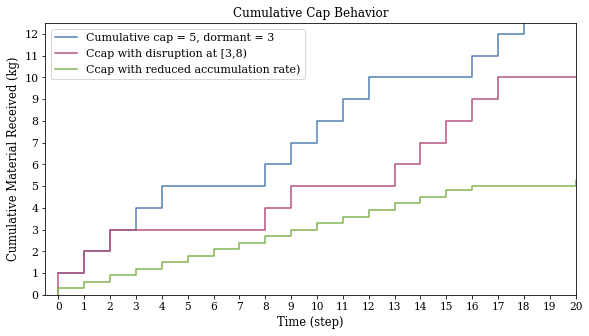

In [15]:
fig = plt.figure(figsize = (9.5, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,20)
plt.ylim(0,12.5)
ax.set_xticks(np.arange(0, 21, 1))
ax.set_yticks(np.arange(0, 13, 1))


# ax.step(data['no-behavior']['t_r']['Time'],
#         data['no-behavior']['t_r']['CumQuant'],
#         where='post',
#         color= '0.6',
#         label='Default behavior')

ax.step(data['ccap-fixed-dormant']['t_r']['Time'],
        data['ccap-fixed-dormant']['t_r']['CumQuant'],
        color= palette[0], where='post',
        label='Cumulative cap = 5, dormant = 3')

ax.step(data['ccap-with-disruption']['t_r']['Time'],
        data['ccap-with-disruption']['t_r']['CumQuant'],
        color= palette[1], where='post',
        label='Ccap with disruption at [3,8)')

ax.vlines(x=0, ymin=0, ymax=1, colors=palette[1])

ax.step(data['ccap-reduced-rate']['t_r']['Time'],
        data['ccap-reduced-rate']['t_r']['CumQuant'],
        color= palette[2], where='post',
        label='Ccap with reduced accumulation rate)')

ax.vlines(x=0, ymin=0, ymax=0.3, colors=palette[2])

ax.legend(loc = 'upper left')

plt.title('Cumulative Cap Behavior')

#plt.savefig('plots/cumulative-oneplot', transparent=True)


In [9]:
data['ccap-with-disruption']['t_r']

,SimId,TransactionId,ResourceId,ObjId,TimeCreated,Time,SenderId,ReceiverId,Commodity,Units,Quantity,CumQuant
0,641d14fc-8881-4c0d-83de-e482418f6c7d,0,6,5,0,0,15,16,commodity,kg,1.0,1.0
1,641d14fc-8881-4c0d-83de-e482418f6c7d,1,13,11,1,1,15,16,commodity,kg,1.0,2.0
3,641d14fc-8881-4c0d-83de-e482418f6c7d,3,20,17,2,2,15,16,commodity,kg,1.0,3.0
6,641d14fc-8881-4c0d-83de-e482418f6c7d,6,37,33,8,8,18,16,commodity,kg,1.0,4.0
7,641d14fc-8881-4c0d-83de-e482418f6c7d,7,44,39,9,9,18,16,commodity,kg,1.0,5.0
10,641d14fc-8881-4c0d-83de-e482418f6c7d,10,54,48,13,13,18,16,commodity,kg,1.0,6.0
11,641d14fc-8881-4c0d-83de-e482418f6c7d,11,61,54,14,14,18,16,commodity,kg,1.0,7.0
13,641d14fc-8881-4c0d-83de-e482418f6c7d,13,68,60,15,15,18,16,commodity,kg,1.0,8.0
15,641d14fc-8881-4c0d-83de-e482418f6c7d,15,75,66,16,16,18,16,commodity,kg,1.0,9.0
17,641d14fc-8881-4c0d-83de-e482418f6c7d,17,82,72,17,17,18,16,commodity,kg,1.0,10.0


In [10]:
data['ccap-fixed-dormant']['t_r']

,SimId,TransactionId,ResourceId,ObjId,TimeCreated,Time,SenderId,ReceiverId,Commodity,Units,Quantity,CumQuant
0,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,0,6,5,0,0,12,13,commodity,kg,1.0,1.0
1,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,1,13,11,1,1,12,13,commodity,kg,1.0,2.0
3,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,3,20,17,2,2,12,13,commodity,kg,1.0,3.0
5,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,5,27,23,3,3,12,13,commodity,kg,1.0,4.0
7,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,7,34,29,4,4,12,13,commodity,kg,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,117,452,392,92,92,12,13,commodity,kg,1.0,60.0
120,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,120,462,401,96,96,12,13,commodity,kg,1.0,61.0
121,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,121,469,407,97,97,12,13,commodity,kg,1.0,62.0
123,80fcf8a0-2ab2-4c59-9a0f-7533daa79d51,123,476,413,98,98,12,13,commodity,kg,1.0,63.0
